# Project: Causality and Inference

**Bogor, 9th November 2024**

# Introduction and Background

**Marketing Campaign**

Saat ini, strategi marketing suatu perusahaan hanya mengandalkan Public Service Announcements (PSA). Tim marketing perusahaan tersebut ingin melakukan kampanye baru untuk menyukseskan pemasaran produk yaitu dengan menggunakan ads / iklan. Namun, perusahaan belum yakin penggunaan ads dapat meningkatkan user conversions.

**Setting Up Problem**

Mengetahui pengaruh Public Service Announcements (PSA) dan ads terhadap conversions rate. Sehingga menjadi pertimbangan tim marketing untuk menentukan strategi marketing.

# Dataset
---

Dengan asumsi **Randomization Unit** yaitu orang yang berkunjung ke website

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\aiforesee\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# read CSV
df = pd.read_csv('marketing/marketing_strategy.csv')
df.tail()

,user id,group,after,converted,total ads,most ads day,most ads hour
22395,906027,ad,True,False,1,Tuesday,22
22396,912634,psa,True,False,1,Tuesday,22
22397,916183,psa,True,False,3,Tuesday,22
22398,910804,ad,True,False,4,Tuesday,23
22399,922728,psa,True,False,16,Tuesday,23


## Check the Data Quality
---

In [3]:
# cek Variable yang tersedia
df.columns

Index(['user id', 'group', 'after', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [4]:
# cek data dengan tipe datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user id        22400 non-null  int64 
 1   group          22400 non-null  object
 2   after          22400 non-null  bool  
 3   converted      22400 non-null  bool  
 4   total ads      22400 non-null  int64 
 5   most ads day   22400 non-null  object
 6   most ads hour  22400 non-null  int64 
dtypes: bool(2), int64(3), object(2)
memory usage: 918.9+ KB


**Missing Value Checking**

In [5]:
# cek missing value
pd.DataFrame(df.isna().sum()).rename(columns = {0:"missing value"})

,missing value
user id,0
group,0
after,0
converted,0
total ads,0
most ads day,0
most ads hour,0


Tidak terdapat missing value dalam data

**Duplicate Value Checking**

In [6]:
# cek duplicate data
df.duplicated(['user id']).sum()

11200

In [7]:
pd.crosstab(df['group'], df['after'])

after,False,True
group,,
ad,5600,5600
psa,5600,5600


Duplikasi terjadi karena setiap user berada dalam fase sebelum treatment dan fase setelah treatment.

## Data Exploration
---

Berikut grafik distribusi kelompok treatment dan kelompok kontrol pada fase sebelum treatment dan fase setelah treatment. 

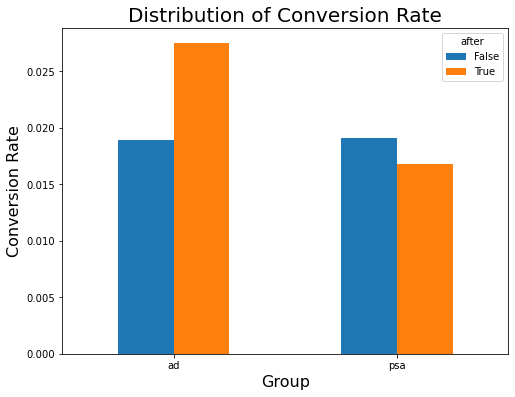

In [8]:
tab = pd.crosstab(df['group'][df['converted'] == True], df['after'][df['converted'] == True])/pd.crosstab(df['group'], df['after'])

fig, ax = plt.subplots(figsize=(8,6))
tab.plot(kind='bar', ax=ax)

# Styling plot
plt.title('Distribution of Conversion Rate', fontsize=20)
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
plt.xticks(rotation=0)
plt.show()

Setelah dilakukan treatment, kelompok treatment mengalami peningkatan conversion rate sedangkan kelompok kontrol mengalami penurunan conversion rate.

# Causal Inference Method : Difference-in-Differences
---

Objektif pada DID yaitu melihat perubahan pada kelompok yang diberikan  treatment selama masa transisi dari periode pre-treatment ke periode post-treatment, dengan pembandingnya adalah perubahan pada kelompok yang tidak diberi perlakuan (kontrol).

In [9]:
# menghitung rata-rata pada fase sebelum dan sesudah pada kedua kelompok
did = df.groupby(['group', 'after']).agg(converted_mean=('converted', 'mean')).reset_index()
did

,group,after,converted_mean
0,ad,False,0.018929
1,ad,True,0.027500
2,psa,False,0.019107
3,psa,True,0.016786


$
\text{Untreated Diff} = \text{Treated Group After} - \text{Treated Group Before} \\
\text{Untreated Diff} = 0.016786 - 0.019107 \\
\text{Untreated Diff} = -0.002321
$

In [13]:
# menghitung perbedaan sebelum-sesudah pada untreated group (time effect)
psa_diff = did.loc[3, 'converted_mean'] - did.loc[2, 'converted_mean']
psa_diff

-0.0023214285714285715

$
\text{Treated Diff} = \text{Treated Group After} - \text{Treated Group Before} \\
\text{Treated Diff} = 0.027500 - 0.018929 \\
\text{Treated Diff} = 0.008571
$

In [14]:
# menghitung perbedaan sebelum-sesudah pada treated group (time and treatment effect)
ad_diff = did.loc[1, 'converted_mean'] - did.loc[0, 'converted_mean']
ad_diff

0.00857142857142857

$
\text{DID Estimate} = \text{Treated Diff} - \text{Untreated Diff} \\
\text{DID Estimate} = 0.008571 - (−0.002321) \\
\text{DID Estimate} = 0.010893
$

In [12]:
# menghitung Difference-in-Difference (DID)
did_estimate = ad_diff - psa_diff
did_estimate

0.010892857142857142

Berdasarkan perhitungan DID, dapat diestimasikan efek penggunaan ***ads memberikan pengingkatan sebesar 0.01 (1%) pada conversion rate***.

# Conclusion and Recommendation
---

***The Conclusions***

- Berdasarkan grafik, kelompok treatment mengalami peningkatan conversion rate sedangkan kelompok kontrol mengalami penurunan conversion rate.
- Front door path : Treatment → Outcome
- Back door paths : Treatment ← Time → Outcome dan Treatment ← Group → Outcome
- Untuk mengisolasi back doors pada Time dan Group dapat dilakukan Difference-in-Differences (DID).
- Berdasarkan perhitungan DID, dapat diestimasikan efek penggunaan ads memberikan pengingkatan conversion rate sebesar 0.01 (1%).

***Recommendations for the business***

Berdasarkan hasil Causal Inference dengan menggunakan Difference-in-Differences (DID) diperoleh estimasi penggunaan ads memberikan efek peningkaran conversion rate sebesar 1%. Namun untuk membuat keputusan apakah akan akan menggunakan ads atau tidak, harus dipastikan secara practically sigificant seperti biaya ad, biaya maintanance dll.

***Recommendationsfor the next experiment***

Pada experiment selanjutnya dapat dilakukan penambahan dataset atau menggunakan metode lain seperti regresi.

# Reference
---

- https://medium.com/@roihatul.mahmudah/marketing-strategy-567af197de17
- Klein, Nick Huntington. (2021). The Effect
- Alves, Matheus Facure. (2022). Causal Inference for The Brave and True